- Đỗ Minh Khôi 23520763
- Trương Nguyên Khoa 23520756

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 

# Tiền xử lý dữ liệu Amazon Sale Dataset

Các thuộc tính: Quantity, UnitPrice, Discount, Tax, ShippingCost, Category, Brand, PaymentMethod, OrderStatus, OrderDate, Country

In [2]:
# Đọc dữ liệu
df = pd.read_csv('Nhom11_Amazon_SaleData.csv')

df.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


## Khám phá dữ liệu ban đầu

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OrderID        100000 non-null  object 
 1   OrderDate      100000 non-null  object 
 2   CustomerID     100000 non-null  object 
 3   CustomerName   100000 non-null  object 
 4   ProductID      100000 non-null  object 
 5   ProductName    100000 non-null  object 
 6   Category       100000 non-null  object 
 7   Brand          100000 non-null  object 
 8   Quantity       100000 non-null  int64  
 9   UnitPrice      100000 non-null  float64
 10  Discount       100000 non-null  float64
 11  Tax            100000 non-null  float64
 12  ShippingCost   100000 non-null  float64
 13  TotalAmount    100000 non-null  float64
 14  PaymentMethod  100000 non-null  object 
 15  OrderStatus    100000 non-null  object 
 16  City           100000 non-null  object 
 17  State          100000 non-null

,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.001400,302.905748,0.074226,68.468902,7.406660,918.256479
std,1.413548,171.840797,0.082583,74.131180,4.324057,724.508332
min,1.000000,5.000000,0.000000,0.000000,0.000000,4.270000
25%,2.000000,154.190000,0.000000,15.920000,3.680000,340.890000
50%,3.000000,303.070000,0.050000,45.250000,7.300000,714.315000
75%,4.000000,451.500000,0.100000,96.060000,11.150000,1349.765000
max,5.000000,599.990000,0.300000,538.460000,15.000000,3534.980000


## Xử lý dữ liệu trùng lặp

In [4]:
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    df = df.drop_duplicates()

## Kiểm tra và xử lý giá trị thiếu (Handle Missing Values)

Kiểm tra các giá trị thiếu (missing values) trong dataset và quyết định phương pháp xử lý phù hợp (điền khuyết hoặc xóa).

In [5]:
# Kiểm tra giá trị thiếu
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({"Missing Count": missing_values, "Percentage": missing_percentage})
missing_df = missing_df[missing_df["Missing Count"] > 0].sort_values(
    "Missing Count", ascending=False
)

if len(missing_df) > 0:
    print("Các cột có giá trị thiếu:")
    print(missing_df)
    print("\n" + "=" * 50)
else:
    print("Không có giá trị thiếu trong dataset")
    print("\n" + "=" * 50)

# Hiển thị tổng quan về missing values
print(f"\nTổng số giá trị thiếu: {df.isnull().sum().sum()}")
print(f"Tỷ lệ giá trị thiếu: {(df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100:.2f}%")

Không có giá trị thiếu trong dataset


Tổng số giá trị thiếu: 0
Tỷ lệ giá trị thiếu: 0.00%


## Xử lý giá trị thiếu

In [6]:
# Lưu bản sao
df_backup = df.copy()

# Kiểm tra giá trị thiếu
missing_values = df.isnull().sum()
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': (missing_values / len(df)) * 100
})
missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

,Missing Count,Percentage


### Điền khuyết cho cột số (dùng median)

In [7]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

### Điền khuyết cho cột phân loại (dùng mode)

In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0] if len(df[col].mode()) > 0 else 'Unknown'
        df[col].fillna(mode_value, inplace=True)

## Chuẩn hóa kiểu dữ liệu và làm sạch dữ liệu phân loại

In [9]:
# Chuyển đổi OrderDate sang datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')

# Làm sạch cột phân loại
categorical_cols = ['Category', 'Brand', 'PaymentMethod', 'OrderStatus', 'Country']

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()
        df[col] = df[col].str.replace(r'\s+', ' ', regex=True)
        df[col] = df[col].str.title()

## Kiểm tra giá trị không hợp lệ

In [10]:
# Kiểm tra và xử lý giá trị không hợp lệ
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] >= 0]

# Chuẩn hóa Discount về 0-1 nếu cần
if df['Discount'].max() > 1:
    df['Discount'] = df['Discount'] / 100

df = df[(df['Discount'] >= 0) & (df['Discount'] <= 1)]
df = df[df['Tax'] >= 0]
df = df[df['ShippingCost'] >= 0]

## Phát hiện outliers (IQR method)

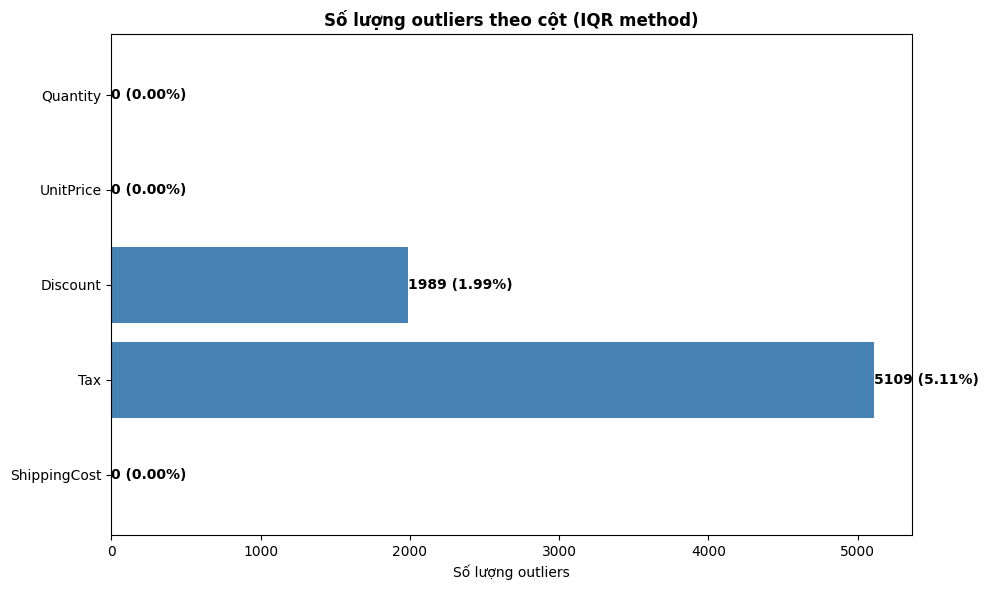

,Column,Lower Bound,Upper Bound,Outliers,Percentage
0,Quantity,-1.000,7.000,0,0.000
1,UnitPrice,-291.775,897.465,0,0.000
2,Discount,-0.150,0.250,1989,1.989
3,Tax,-104.290,216.270,5109,5.109
4,ShippingCost,-7.525,22.355,0,0.000


In [11]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

numeric_cols = ['Quantity', 'UnitPrice', 'Discount', 'Tax', 'ShippingCost']
outlier_summary = []
for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_summary.append({
        'Column': col,
        'Lower Bound': lower,
        'Upper Bound': upper,
        'Outliers': len(outliers),
        'Percentage': len(outliers) / len(df) * 100
    })

outlier_df = pd.DataFrame(outlier_summary)
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(outlier_df['Column'], outlier_df['Outliers'], color='steelblue')
ax.set_title('Số lượng outliers theo cột (IQR method)', fontweight='bold')
ax.set_xlabel('Số lượng outliers')
ax.invert_yaxis()
for i, v in enumerate(outlier_df['Outliers']):
    ax.text(v, i, f'{v} ({outlier_df.iloc[i]["Percentage"]:.2f}%)', 
            va='center', fontweight='bold')
plt.tight_layout()
plt.show()

outlier_df

In [12]:
# Xử lý outliers bằng capping (giới hạn giá trị ở ngưỡng IQR)
# Lưu ý: Có thể bỏ qua bước này nếu outliers là hợp lệ trong ngữ cảnh nghiệp vụ

def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Đảm bảo không capping dưới giá trị tối thiểu hợp lý (ví dụ: không âm cho giá, số lượng)
    if column in ["Quantity", "UnitPrice", "Discount", "Tax", "ShippingCost", "TotalAmount"]:
        lower_bound = max(0, lower_bound)

    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data


# Áp dụng capping cho các cột cụ thể (có thể bỏ qua nếu cần giữ nguyên outliers)
for col in ["UnitPrice", "Discount", "Tax", "ShippingCost", "TotalAmount"]:
    df = cap_outliers_iqr(df, col)
    print(f"Đã áp dụng capping cho cột {col}")

Đã áp dụng capping cho cột UnitPrice
Đã áp dụng capping cho cột Discount
Đã áp dụng capping cho cột Tax
Đã áp dụng capping cho cột ShippingCost
Đã áp dụng capping cho cột TotalAmount


## Feature Engineering ##

In [13]:
df["Revenue"] = df.apply(
    lambda row: row["TotalAmount"] if row["OrderStatus"] == "Delivered" else 0, axis=1
)
df["OrderDate"] = pd.to_datetime(df["OrderDate"])
# Tạo các biến phụ trợ cho phân tích
df["Year"] = df["OrderDate"].dt.year
df["Month"] = df["OrderDate"].dt.month
df["Quarter"] = df["OrderDate"].dt.quarter
df["YearMonth"] = df["OrderDate"].dt.to_period("M")
df["DayOfWeek"] = df["OrderDate"].dt.day_name()
df["MonthName"] = df["OrderDate"].dt.month_name()
df["DayOfMonth"] = df["OrderDate"].dt.day

## Tổng kết và lưu dữ liệu

In [14]:
summary = {
    'Shape ban đầu': df_backup.shape,
    'Shape sau khi làm sạch': df.shape,
    'Số dòng đã xóa': len(df_backup) - len(df),
    'Giá trị thiếu': df.isnull().sum().sum(),
    'Dữ liệu trùng lặp': df.duplicated().sum()
}
pd.Series(summary)

Shape ban đầu             (100000, 20)
Shape sau khi làm sạch    (100000, 28)
Số dòng đã xóa                       0
Giá trị thiếu                        0
Dữ liệu trùng lặp                    0
dtype: object

## Tổng kết

### So sánh dataset gốc và đã xử lý

| Tiêu chí | Dataset gốc | Dataset đã xử lý |
|---------|-------------|------------------|
| Số cột | 20 | 11 |
| Số dòng | 100,000 | 100,000 |
| Giá trị thiếu | 0 | 0 |
| Dữ liệu trùng lặp | 0 | 0 |
| Kiểu dữ liệu | Hỗn hợp | Đã chuẩn hóa |

**Các cột đã loại bỏ**: OrderID, CustomerID, CustomerName, ProductID, ProductName, City, SellerID, TotalAmount, State

### Kỹ thuật sử dụng

1. **Lựa chọn thuộc tính**: Giữ lại 11 thuộc tính quan trọng
2. **Xử lý trùng lặp**: `drop_duplicates()`
3. **Xử lý giá trị thiếu**: 
   - Cột số: Điền bằng `median()`
   - Cột phân loại: Điền bằng `mode()`
4. **Chuẩn hóa dữ liệu**:
   - OrderDate: `pd.to_datetime()`
   - Cột phân loại: `str.strip()`, `str.title()`
5. **Kiểm tra giá trị không hợp lệ**: Lọc theo điều kiện (Quantity > 0, Discount [0,1], v.v.)
6. **Phát hiện outliers**: Phương pháp IQR (Interquartile Range)

In [15]:
# Lưu dữ liệu đã làm sạch
output_filename = 'Nhom11_Amazon_SaleData_Cleaned.csv'
df.to_csv(output_filename, index=False)
df.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID,Revenue,Year,Month,Quarter,YearMonth,DayOfWeek,MonthName,DayOfMonth
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,Brightlux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967,319.86,2023,1,1,2023-01,Tuesday,January,31
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,Urbanstyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298,259.64,2023,12,4,2023-12,Saturday,December,30
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,Urbanstyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908,108.06,2022,5,2,2022-05,Tuesday,May,10
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash On Delivery,Delivered,Charlotte,NC,India,SELL01164,159.66,2023,7,3,2023-07,Tuesday,July,18
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,Kiddofun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411,0.00,2023,2,1,2023-02,Saturday,February,4
